# **PyTorch Computer Vision (CNN)**
# **1. Numerically ENCODE your DATA**

# **2. Feed it into a MODEL**

# **3. Make sure your OUTPUT fits your specific problem.**

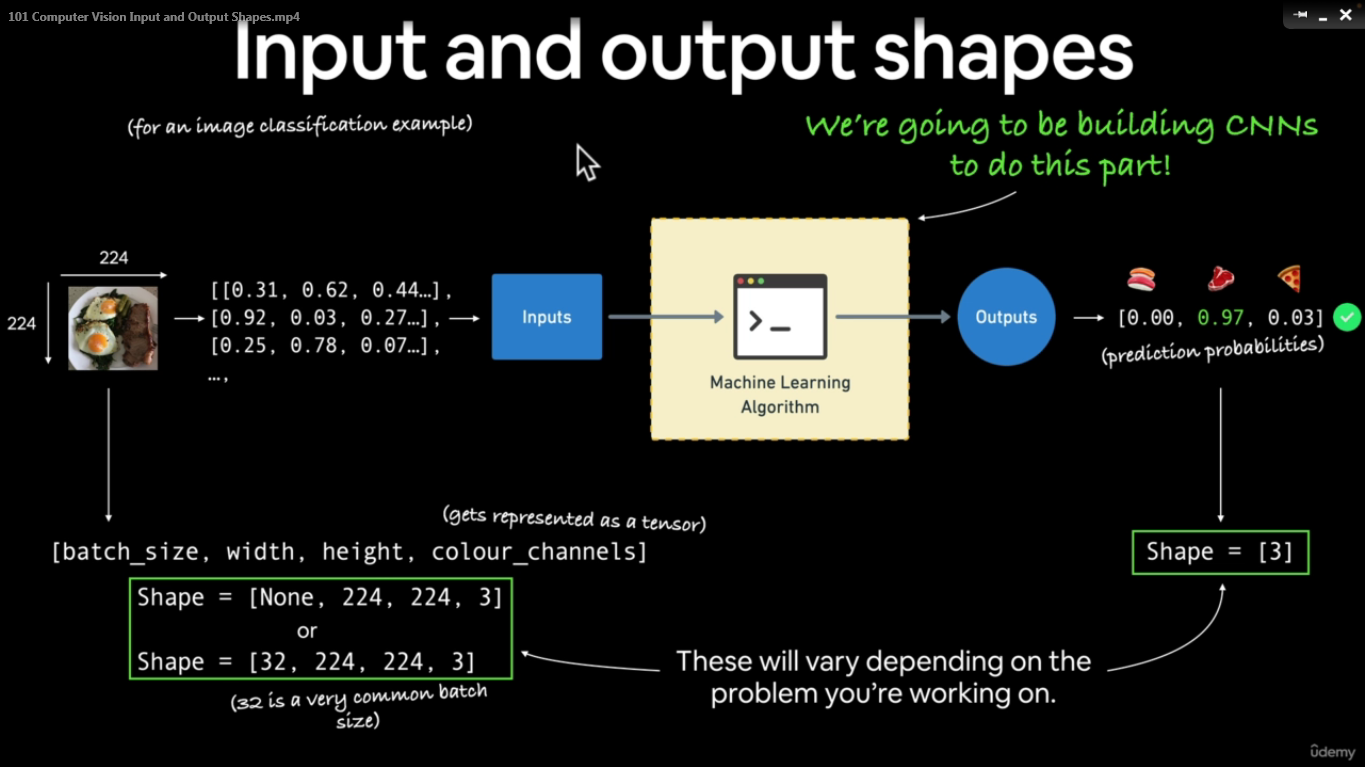

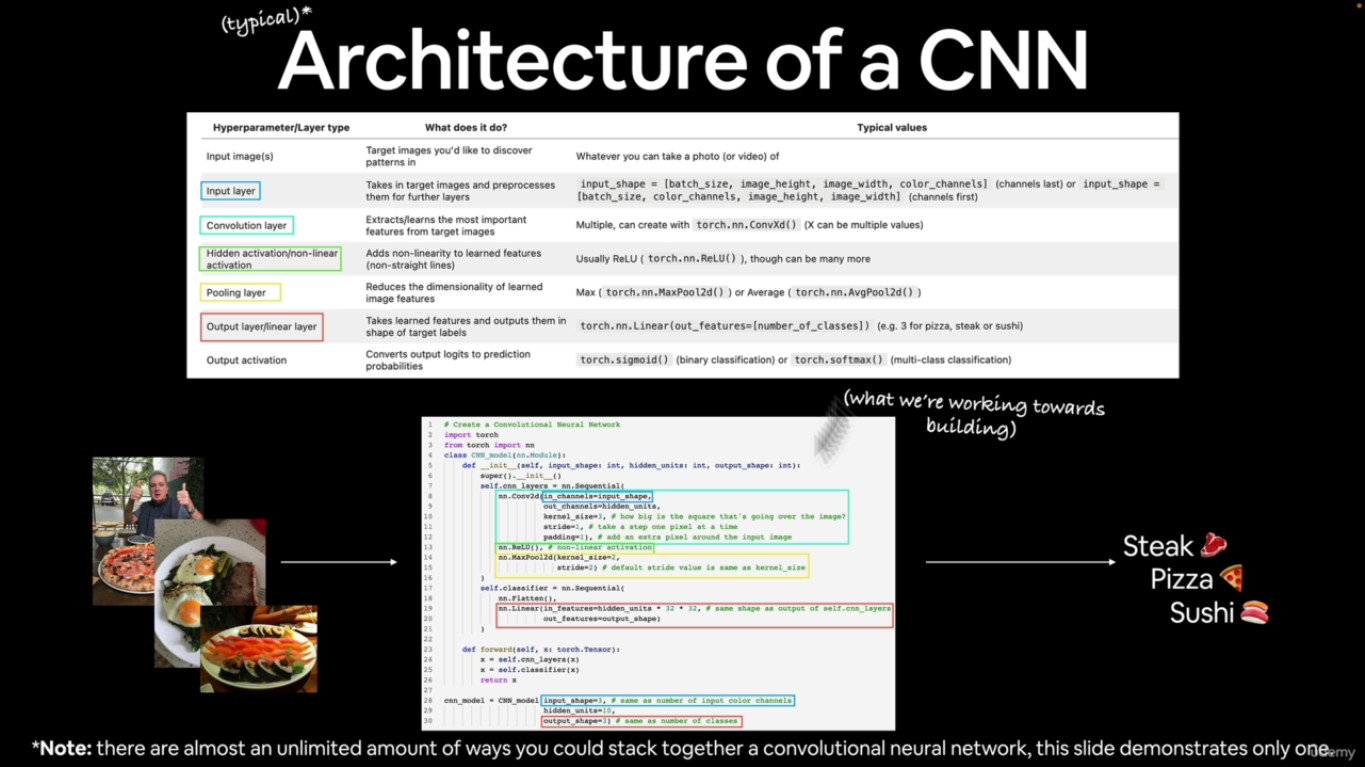

## **0. Computer Vision Libraries in PyTorch**

### *** torchvision - base domain library for PyTorch Computer Vision**

### *** torchvision.datasets - get DATASETS and DATA LOADING FUNCTIONS for Computer Vision**

### *** torchvision.models - get PRE-TRAINED COMPUTER VISION MODELS that you can leverage for your own problems**

### *** torchvision.transforms - FUNCTIONS for MANIPULATING your VISION DATA (images) to be suitable for use with an ML model**

### *** torch.utils.data.Dataset - base dataset class for PyTorch**

### *** torch.utils.data.Dataloader - creates a Python iterable over a DATASET**

In [1]:
# Import PyTorch
import torch
from torch import nn

# Import torchvision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

# Import Matplotlib for Visualization
import matplotlib.pyplot as plt

# Check versions
print(torch.__version__)
print(torchvision.__version__)

2.3.0+cu121
0.18.0+cu121


## **1. Getting a DATASET**

The **DATASET** we'll be using is **FashionMNIST** from **torchvision.datasets**

In [2]:
# Setup training data
from torchvision import datasets
train_data = datasets.FashionMNIST(
    root = "data", # Where to download data to?
    train = True, # Do we want the training dataset?
    download = True, # Do we want to download yes/no?
    transform = torchvision.transforms.ToTensor(), # How do we want to transform the data?
    target_transform = None # How do we want to transform the labels/targets?
)

# Setup testing data
test_data = datasets.FashionMNIST(
    root = "data",
    train = False,
    download = True,
    transform = ToTensor(),
    target_transform = None
)

100%|██████████| 26421880/26421880 [00:05<00:00, 4800469.70it/s] 


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 267675.61it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 5026962.07it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 23572354.79it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [3]:
len(train_data), len(test_data)

(60000, 10000)

In [4]:
# See the first training example
image, label = train_data[0]
image, label

# Thanks to - https://pytorch.org/vision/main/generated/torchvision.transforms.ToTensor.html. We can use samples

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [5]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [6]:
# This is gonna give us a dictionary of different labels and corresponding index.
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [7]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [8]:
# Check the shape of our image
print(f"Image shape: {image.shape} -> [colour_channels, height, width]")
print(f"Image label: {class_names[label]}") # Label is an INTEGER
print(f"GRAY SCALE IMAGE has JUST ONE COLOR CHANNEL. It means that a BLACK PIXEL VALUE IS 0 and a WHITE PIXEL VALUE IS ABOVE 0")

Image shape: torch.Size([1, 28, 28]) -> [colour_channels, height, width]
Image label: Ankle boot
GRAY SCALE IMAGE has JUST ONE COLOR CHANNEL. It means that a BLACK PIXEL VALUE IS 0 and a WHITE PIXEL VALUE IS ABOVE 0


## **1.2 Visualizing our DATA**

Image shape: torch.Size([1, 28, 28])


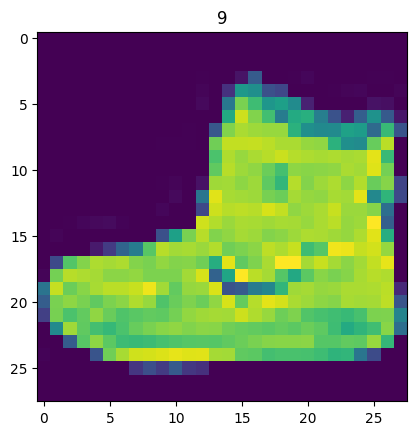

In [9]:
import matplotlib.pyplot as plt
image, label = train_data[0]
print(f"Image shape: {image.shape}")
plt.imshow(image.squeeze()) # For GRAY SCALE we can get rid of that EXTRA DIMENSION by PASSING SQUEEZE()
plt.title(label);
# image

### **The shape of your INPUT DATA doesn't match the expected shape of that TENSOR**

**MATPLOTLIB expects either just HEIGHT and WIDTH (HW) or NO COLOUR CHANNEL FOR GRAY SCALE IMAGES or it expects to be the COLOUR CHANNEL TO BE LAST**

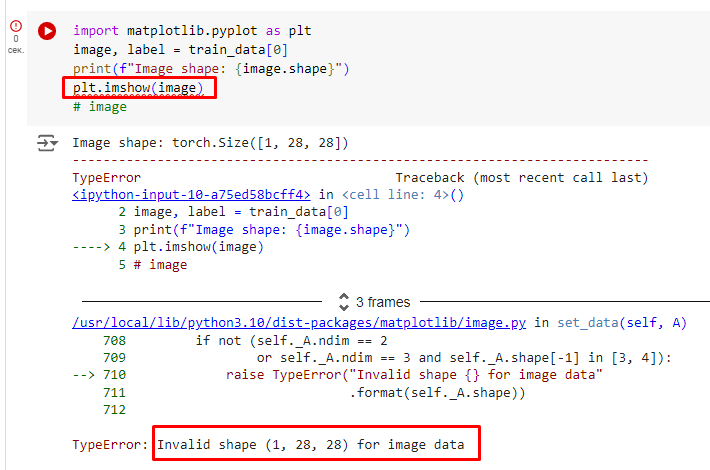

(-0.5, 27.5, 27.5, -0.5)

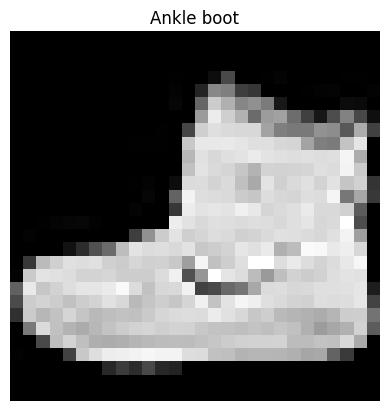

In [10]:
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label]);
plt.axis(False)

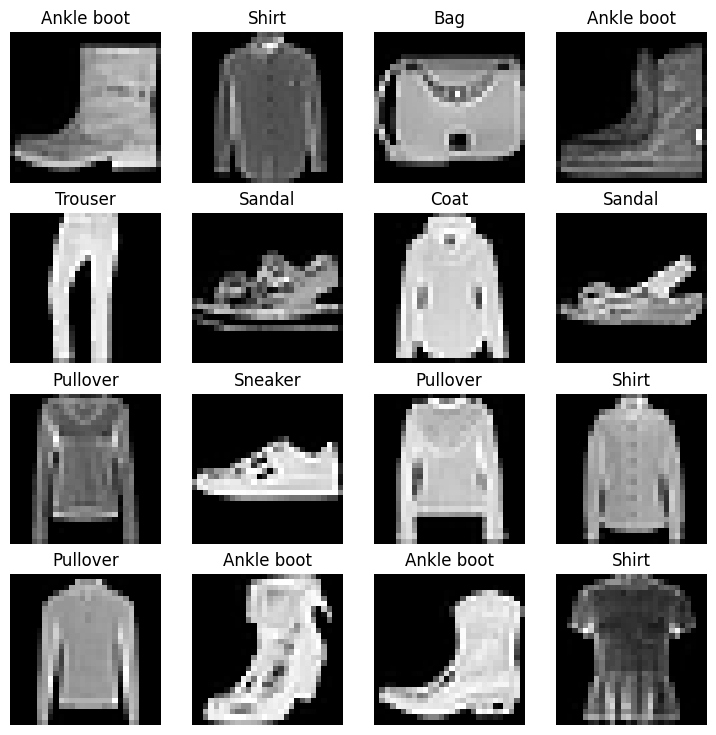

In [11]:
# Plot more images
torch.manual_seed(42)
fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4
for i in range(1, rows*cols+1):
  random_idx = torch.randint(0, len(train_data), size=[1]).item()
  img, label = train_data[random_idx]
  fig.add_subplot(rows, cols, i)
  plt.imshow(img.squeeze(), cmap="gray")
  plt.title(class_names[label])
  plt.axis(False);


### Do you think these items of clothing (images) could be modelled with pure linear lines? Or do you think we'll need non-linearitites?

In [12]:
train_data, test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

## **2. Prepare DataLoader**

## Right now our data is in the form of PyTorch Datasets.

## DataLoader turns our DATASET into a PyTorch ITERABLE.

## More specifically, we want to turn our DATA into BATCHES (or MINI-BATCHES)

## Why would we do this?

## 1. It is more computationally efficient, as in your computing hardware may not be able to look (store in memory) at 60.000 images in ONE HIT.
## So we break it down to 32 images at a time (batch size of 32)

## 2. It gives our NEURAL NETWORK more chances to UPDATE its GRADIENTS per epoch.

In [13]:
from torch.utils.data import DataLoader

# Setup the batch size HYPERPARAMETER
BATCH_SIZE = 32

# Turn datasets into iterables (BATCHES)
train_dataloader = DataLoader (dataset=train_data,
                               batch_size=BATCH_SIZE,
                               shuffle=True) # We shuffle the TRAIN TO REMOVE ORDER. So our model doesn't learn ORDER.

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False) # It is actually easier to EVALUATE different models when the TEST DATA IS NOT SHUFFLED.

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7c70c486d030>,
 <torch.utils.data.dataloader.DataLoader at 0x7c70c4ccf8e0>)

# Generally it is good to have your TEST DATA in the SAME ORDER. Because our model will NEVER SEE THE TEST DATASET during TRAINING. We need false for EVALUATION and not to be shuffled every single time.

In [14]:
# Let's check out what we've created
print(f"DataLoaders: {train_dataloader, test_dataloader}")
print(f"Length of train_dataloader: {len(train_dataloader)} batches of {BATCH_SIZE} ...")
print(f"Length of test_dataloader: {len(test_dataloader)} batches of {BATCH_SIZE} ...")

DataLoaders: (<torch.utils.data.dataloader.DataLoader object at 0x7c70c486d030>, <torch.utils.data.dataloader.DataLoader object at 0x7c70c4ccf8e0>)
Length of train_dataloader: 1875 batches of 32 ...
Length of test_dataloader: 313 batches of 32 ...


In [15]:
# Check out what's inside the TRAINING DATALOADER
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size: torch.Size([1, 28, 28])
Label: 8, label size: torch.Size([])


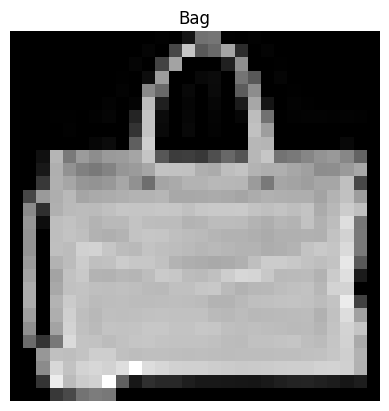

In [16]:
# Show a sample
# torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False) # we can use instead of False - "off" also.
print(f"Image size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")

## **3. Model 0: Build a baseline model**

## When starting to build a series of machine learning modelling experiments, it's best practice to start with a baseline model.

## A baseline model is a simple model you will try and improve upon with subsequent models/experiments.

## In other words: start simply and add complexity when necessary.

In [17]:
# Create a flatten layer
flatten_model = nn.Flatten() # All nn.Flatten() or nn.Module() could be used as a model on their own

# Get a single sample
x = train_features_batch[0]

# Flatten the sample
output = flatten_model(x) # Perform FORWARD PASS INTERNALLY

# Print out what happened
print(f"Shape before flattening: {x.shape} -> [colour_channels, height, width]")
print(f"Shape after flattening: {output.shape} -> [colour_channels, height*width]")

Shape before flattening: torch.Size([1, 28, 28]) -> [colour_channels, height, width]
Shape after flattening: torch.Size([1, 784]) -> [colour_channels, height*width]


In [18]:
from torch import nn
class FashionMNISTModelV0(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(), # Flatten layer has no parameters to learn.
        nn.Linear(in_features=input_shape,
                  out_features=hidden_units),
        nn.Linear(in_features=hidden_units,
                  out_features=output_shape)
    )

  def forward(self, x):
    return self.layer_stack(x) # We have non-linearities

In [19]:
torch.manual_seed(42)

# Setup a model with input parameters
model_0 = FashionMNISTModelV0(
    input_shape=784, # This is 28*28 = 784
    hidden_units=10, # How many units in the hidden layer?
    output_shape=len(class_names) # one for every class
).to("cpu")

model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [20]:
dummy_x = torch.rand([1, 1, 28, 28]) # 1 - batch_size, 1 - colour_channel, 28 - height, 28 - width
model_0(dummy_x) # In the output we have 10 LOGITS (Without activation method)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

## **3.1 Setup loss, optimizer and evaluation metrics**

## * Loss Function - since we're working with multi-class data, our LOSS FUNCTION will be "nn.CrossEntropyLoss()"

## * Optimizer - our OPTIMTIZER "torch.optim.SGD()" (stochastic gradient descent)

## * Evaluation metric - since we're working on a classification problem, let's use accuracy as our evaluation metric.

In [21]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo.
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download...")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f: # wb = write binary, f = file
    f.write(request.content)

In [22]:
# Import Accuracy Metric
from helper_functions import accuracy_fn

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)

## **3.2 Creating a function to time our experiments**

## Machine learning is very experimental.

## Two of the main things you'll often want to track are:

## * 1. Model's performance (Loss and Accuracy values etc)
## * 2. How fast it runs.

In [23]:
from timeit import default_timer as timer
def print_train_time(start: float,
                     end: float,
                     device: torch.device = None):
  """Prints difference between start and end time."""
  total_time = end - start
  print(f"Train time on {device}: {total_time:.3f} seconds")
  return total_time

In [24]:
start_time = timer()
#some code...
end_time = timer()
print_train_time(start=start_time, end=end_time, device="cpu")

Train time on cpu: 0.000 seconds


7.213800000727133e-05

## **3.3 Creating a training loop and training a model on batches of data**

## 1. Loop through epochs.
## 2. Loop through training batches, perform training steps, calculate the **train loss.**
## 3. Loop through testing batches, perform testing steps, calculate the **testing loss.**
## 4. Print out what's happening.
## 5. Time it all (for fun)

In [25]:
# Import tqdm for progress bar
import torch
from torch import nn
from torch.utils.data import DataLoader
from tqdm.auto import tqdm
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor
from timeit import default_timer as timer

# Set the seed and start the timer
torch.manual_seed(42)

train_time_start_on_cpu = timer()

# Set the number of epochs. (We'll keep this small for faster training time)
epochs = 3

# Create a training and a testing loop
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n-----")

    ### TRAINING
    train_loss = 0

    # Add a loop to loop through the training batches
    for batch, (X, y) in enumerate(train_dataloader):
        model_0.train()

        # 1. Forward Pass
        y_pred = model_0(X)

        # 2. Calculate the loss (per batch)
        loss = loss_fn(y_pred, y)
        train_loss += loss # Accumulate train loss

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward()
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

        # Print out what's happening
        if batch % 400 == 0:
          print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples.")


    # Divide total train loss by lenght of train dataloader
    train_loss /= len(train_dataloader)

    ### TESTING
    test_loss, test_acc = 0, 0
    model_0.eval()
    with torch.inference_mode():
       for X_test, y_test in test_dataloader:
            # 1. Forward Pass
            test_pred = model_0(X_test)

            # 2. Calculate the loss (accumulatively)
            test_loss += loss_fn(test_pred, y_test)

            # 3. Calculate the accuracy
            test_acc += accuracy_fn(y_true=y_test, y_pred=test_pred.argmax(dim=1))


       # Calculate the test loss average per batch
       test_loss /= len(test_dataloader)

       # Calculate the test acc average per bacth
       test_acc /= len(test_dataloader)

    # Print out what's happening
    print(f"\nTrain loss: {train_loss:.4f} | Test loss: {test_loss:.4f}, Test acc: {test_acc:.4f}")

# Calculate training time
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu,
                                            end=train_time_end_on_cpu,
                                            device=str(next(model_0.parameters()).device))


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-----
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train loss: 0.5904 | Test loss: 0.5095, Test acc: 82.0387
Epoch: 1
-----
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train loss: 0.4763 | Test loss: 0.4799, Test acc: 83.1969
Epoch: 2
-----
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train loss: 0.4550 | Test loss: 0.4766, Test acc: 83.4265
Train time on cpu: 26.153 seconds


In [26]:
str(next(model_0.parameters()).device)

'cpu'

# You see how this loss calculation is within the batch loop above. This means that one batch of data is gonna go through the model. And then we'll calculate the loss on ONE BATCH of DATA. And this loop is gonna continue until it has been through **all the BATCHES** in **train_dataloader**.

## **4. Make predictions and get Model_0 results**

In [27]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):
  """Returns a dictionary containing the results of model predicting on data_loader."""
  loss, acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X, y in tqdm(data_loader):
      # Make predictions
      y_pred = model(X)

      # Accumulate the loss and acc values per batch
      loss += loss_fn(y_pred, y)
      acc += accuracy_fn(y_true=y,
                         y_pred=y_pred.argmax(dim=1))
    # Scale loss and acc to find the average loss/acc per batch
    loss /= len(data_loader)
    acc /= len(data_loader)

  return {"model_name": model.__class__.__name__, # only works when model was created with a class
          "model_loss": loss.item(),
          "model_acc": acc}

# Calculate model 0 results on test dataset
model_0_results = eval_model(model=model_0,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn)

model_0_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

# **5. Setup device-agnostic code**

In [28]:
# Setup device-agnostic code
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

## **6. Building a better model with non-linearity**

In [29]:
# Create a model with non-linear and linear layers
class FashionMNISTModelV1(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(), # flatten inputs into a single vector
        nn.Linear(in_features=input_shape,
                  out_features=hidden_units),
        nn.ReLU(), # ReLU layer will not change the shapes of our DATA
        nn.Linear(in_features=hidden_units,
                  out_features=output_shape),
        nn.ReLU()
    )

  # We have to OVERWRIGHT the FORWARD METHOD
  def forward(self, x: torch.Tensor): # torch.Tensor will be as the input
      return self.layer_stack(x) # X will pass through the layer_stack above

In [30]:
# Create an instance of model_1
# Whenever we create a new instance of a new model, it's gonna be instantiated new random numbers
torch.manual_seed(42)
model_1 = FashionMNISTModelV1(input_shape=728, # this is the output of the flatten after our 28*28 image goes in
                              hidden_units=10,
                              output_shape=len(class_names)).to(device) # Send to the GPU if it's available

next(model_1.parameters()).device

device(type='cuda', index=0)

## **6.1 Setup loss, optimizer and evaluation metrics**

In [31]:
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss() # measure how wrong our model is
optimizer = torch.optim.SGD(params=model_1.parameters(), # Tries to update our model's parameters to reduce the loss
                            lr=0.1)

## **6.2 Functionizing training and evaluation/testing loops**

# Let's create a function for:

# * training loop - 'train_step()'

# * testing loop - 'test_step()'

In [32]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
  """Performs a training step with model trying to learn on data_loader."""
  train_loss, train_acc = 0, 0

  # Put model into training mode
  model.train()

  # Add a loop to loop through the training batches
  for batch, (X, y) in enumerate(data_loader):
      # Put data on target device
      X, y = X.to(device), y.to(device)

      # 1. Forward Pass (outputs the raw logits from the model)
      y_pred = model(X)

      # 2. Calculate the loss and accuracy (per batch)
      loss = loss_fn(y_pred, y)
      train_loss += loss # Accumulate train loss
      train_acc += accuracy_fn(y_true=y,
                             y_pred=y_pred.argmax(dim=1)) # go from logits -> prediction labels

      # 3. Optimizer zero grad
      optimizer.zero_grad()

      # 4. Loss backward()
      loss.backward()

      # 5. Optimizer step
      optimizer.step()

  # Divide total train loss and accby lenght of train dataloader
  train_loss /= len(data_loader)
  train_acc /= len(data_loader)
  print(f"Train loss: {train_loss:.5f} | Train acc: {train_acc:.2f}%")

In [33]:
def test_step(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
  """Performs a testing loop step on model going over data_loader."""
  test_loss, test_acc = 0, 0

  # Put the model in eval mode
  model.eval()

  # Turn on inference mode context manager
  with torch.inference_mode():
     for X, y in data_loader:
         # Send the data to the target device
         X, y = X.to(device), y.to(device)

         # 1. Forward pass (outputs raw logits)
         test_pred = model(X)

         # 2. Calculate the loss/acc
         test_loss += loss_fn(test_pred, y)
         test_acc += accuracy_fn(y_true=y,
                                 y_pred=test_pred.argmax(dim=1)) # Go from logits to prediction labels

     # Adjust metrics and print out
     test_loss /= len(data_loader)
     test_acc /= len(data_loader)
     print(f"Test loss: {test_loss:.5f} | Test acc: {test_acc:.2f}%\n")

In [34]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

In [35]:
# Train time on CPU
total_train_time_model_0

26.15341802100002

**Note:** Sometimes, depending on your data/hardware you might find that your model trains faster on CPU that GPU.

* 1. It could be that the overhead for copying data/model to and from the GPU outweights the compute benefits offered by the GPU.

* 2. The hardware you're using has a better CPU in terms compute capability than the GPU.

* Resources: https://horace.io/brrr_intro.html

In [36]:
import torch
import torch.nn as nn

class FashionMNISTModelV1(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),  # flatten inputs into a single vector
            nn.Linear(in_features=input_shape, out_features=hidden_units),  # first hidden layer
            nn.ReLU(),  # activation function
            nn.Linear(in_features=hidden_units, out_features=output_shape)  # output layer
        )

    def forward(self, x: torch.Tensor):
        return self.layer_stack(x)

# Ensure the input shape matches the flattened size of each image
input_shape = 28 * 28  # for FashionMNIST
hidden_units = 10
output_shape = len(class_names)  # number of classes

model_1 = FashionMNISTModelV1(input_shape=input_shape, hidden_units=hidden_units, output_shape=output_shape).to(device)

# Create a new instance of the model
torch.manual_seed(42)
model_1 = FashionMNISTModelV1(
    input_shape=28*28,  # flattened input size
    hidden_units=10,
    output_shape=len(class_names)  # number of classes
).to(device)

# Define loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.1)


In [37]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Measure time
from timeit import default_timer as timer
train_time_start_on_gpu = timer()

# Set epochs
epochs = 3

# Create an optimization and evaluation loop using train_step() and test_step()
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n--------")
  train_step(model=model_1,
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device
  )
  test_step(model=model_1,
            data_loader=test_dataloader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn,
            device=device
  )

train_time_end_on_gpu = timer()
total_train_time_model_1 = print_train_time(start=train_time_start_on_gpu,
                                            end=train_time_end_on_gpu,
                                            device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
--------
Train loss: 0.64607 | Train acc: 77.17%
Test loss: 0.53855 | Test acc: 80.76%

Epoch: 1
--------
Train loss: 0.48094 | Train acc: 82.94%
Test loss: 0.49390 | Test acc: 82.46%

Epoch: 2
--------
Train loss: 0.44689 | Train acc: 84.16%
Test loss: 0.45746 | Test acc: 83.99%

Train time on cuda: 31.934 seconds


In [38]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device=device):
  """Returns a dictionary containing the results of model predicting on data_loader."""
  loss, acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X, y in tqdm(data_loader):
        # Make our data devive agnostic
        X, y = X.to(device), y.to(device)

        # Make predictions
        y_pred = model(X)

        # Accumulate the loss and acc values per batch
        loss += loss_fn(y_pred, y)
        acc += accuracy_fn(y_true=y,
                         y_pred=y_pred.argmax(dim=1))
    # Scale loss and acc to find the average loss/acc per batch
    loss /= len(data_loader)
    acc /= len(data_loader)

  return {"model_name": model.__class__.__name__, # only works when model was created with a class
          "model_loss": loss.item(),
          "model_acc": acc}

In [39]:
# Get model_1 results dictionary
model_1_results = eval_model(model=model_1,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn,
                             device=device)
model_1_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.45746350288391113,
 'model_acc': 83.98562300319489}

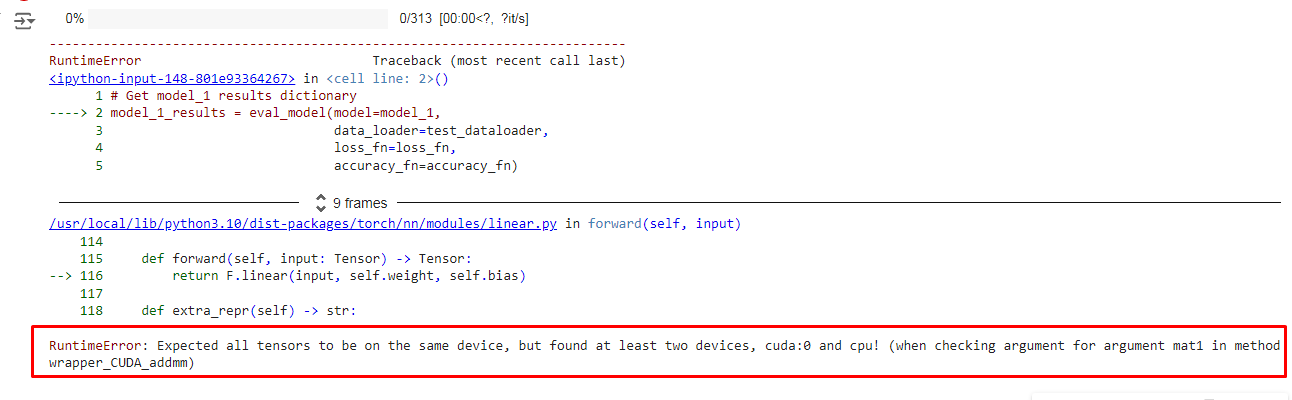

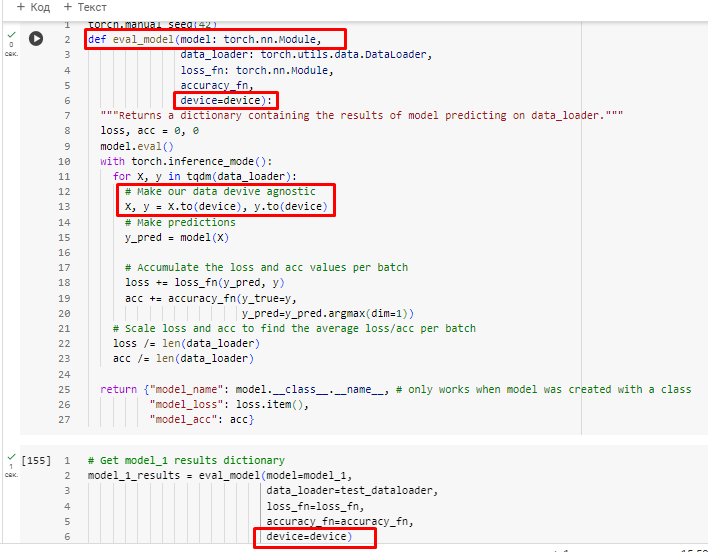

In [40]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

In [41]:
model_1_results

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.45746350288391113,
 'model_acc': 83.98562300319489}

## **6.3 Model 2: Building a Convolutional Neural Network**

## **CNN's are also known as ConvNets**

## **CNN's are known for their capabilities to find patterns in VISUAL DATA**

## **To find out what's happening inside a CNN, see this website - https://poloclub.github.io/cnn-explainer/**

## **This is what MaxPool does**

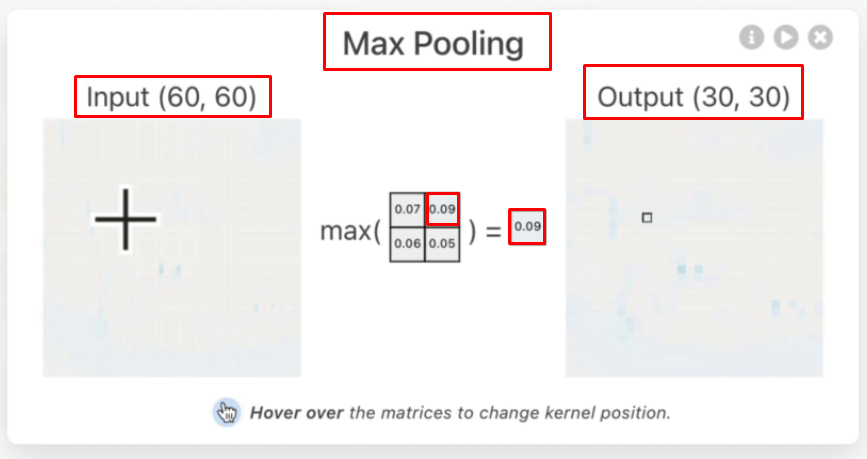

In [42]:
# Create a Convolutional Neural Network
class FashionMNISTModelV2(nn.Module):
  """
  Model architechture that replicates the TinyVGG
  model from CNN explainer website.
  """
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape, # Conv2d = 2 dimensional.
                  out_channels=hidden_units,
                  kernel_size=3, # Kernel can be in tuples (3, 3)
                  stride=1,
                  padding=1), # values we can set ourselves in our NN's are called hyperparameters.
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2) # We'll finish off with nn.MaxPool2d layer. nn.MaxPool2d = Conv2d
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units, # in_channels we want to match with out_channels of previous layer.
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2) # This doesn't have any learnable parameters.
    )
    self.classifier = nn.Sequential( # We're gonna take the outputs of the second block
        nn.Flatten(),  # Because the output of 2 blocks above is going to be a multi-dimensional tensor. Something like (13, 13, 10)
        # So we want to FLATTEN the OUTPUTS into a SINGLE FEATURE VECTOR. And then we want to pass that FEATURE VECTOR to nn.Linear() layer
        nn.Linear(in_features=hidden_units*7*7, # hidden_units *?*. Our nn.Linear layer is expecting the output of the nn.Flatten() as it is in_features
                  out_features=output_shape) # output_shape will be the length of how many classes we have. One value for each class.
    )
# Defining some components and then putting them together to compute in some way in a FORWARD METHOD.
def forward(self, x):
  x = self.conv_block_1(x)
  #print(f"Output shape of conv_block_1: {x.shape}")
  x = self.conv_block_2(x)
  #print(f"Output shape of conv_block_2: {x.shape}")
  x = self.classifier(x)
  #print(f"Output shape of classifier: {x.shape}")
  return x

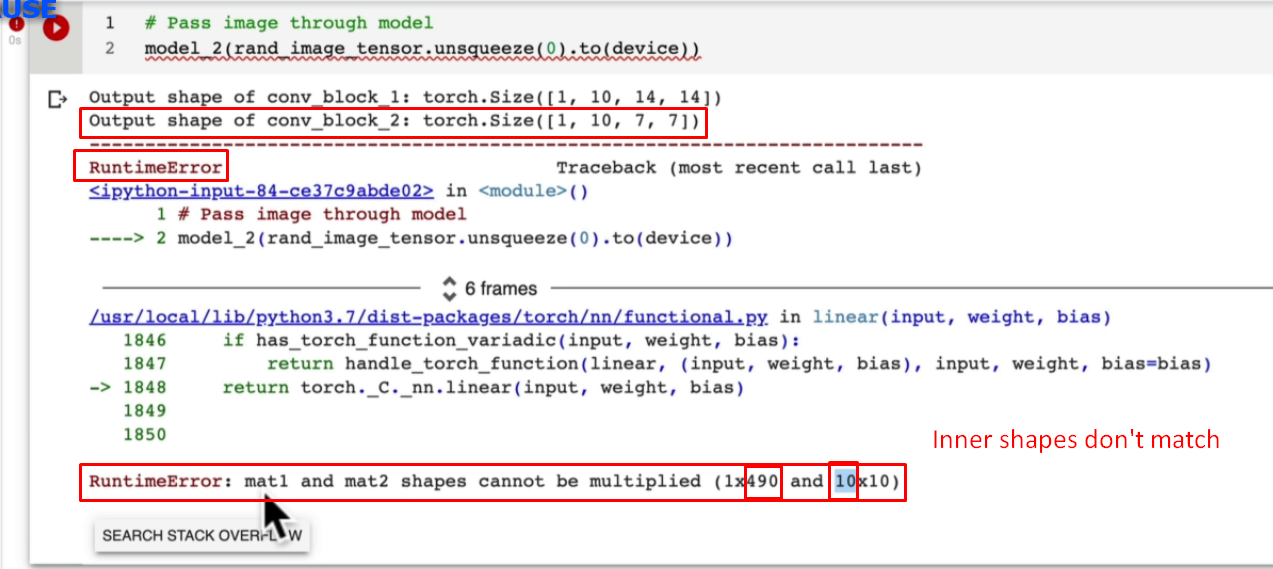

In [43]:
# Pass image through model
# model_2(rand_image_tensor.unsqueeze(0).to(device))

In [44]:
import torch
import torch.nn as nn

class FashionMNISTModelV2(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),  # flatten inputs into a single vector
            nn.Linear(in_features=input_shape, out_features=hidden_units),  # first hidden layer
            nn.ReLU(),  # activation function
            nn.Linear(in_features=hidden_units, out_features=output_shape)  # output layer
        )

    def forward(self, x: torch.Tensor):
        return self.layer_stack(x)

# Ensure the input shape matches the flattened size of each image
input_shape = 28 * 28  # for FashionMNIST
hidden_units = 10
output_shape = len(class_names)  # number of classes

model_2 = FashionMNISTModelV2(input_shape=input_shape, hidden_units=hidden_units, output_shape=output_shape).to(device)

# Create a new instance of the model
torch.manual_seed(42)
model_2 = FashionMNISTModelV2(
    input_shape=28*28,  # flattened input size
    hidden_units=10,
    output_shape=len(class_names)  # number of classes
).to(device)

# Define loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(), lr=0.1)

In [45]:
image.shape

torch.Size([1, 28, 28])

In [46]:
# We're gonna instantiate our first CONVOLUTIONAL NEURAL NETWORK
torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape=1,
                              hidden_units=10,
                              output_shape=len(class_names)).to(device)

In [47]:
rand_image_tensor = torch.randn(size=(1, 28, 28))
rand_image_tensor.shape

torch.Size([1, 28, 28])

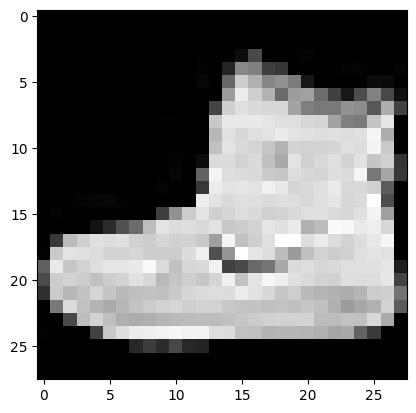

In [48]:
plt.imshow(image.squeeze(), cmap="gray")

## **7. Stepping through nn.Conv2d()**

See - https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html

In [49]:
torch.manual_seed(42)

# Create a batch of images
images = torch.randn(size=(32, 3, 64, 64))
test_image = images[0]

print(f"Image batch shape: {images.shape}")
print(f"Single image shape: {test_image.shape}")
print(f"test_image:\n {test_image}")

Image batch shape: torch.Size([32, 3, 64, 64])
Single image shape: torch.Size([3, 64, 64])
test_image:
 tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

        [[-0

In [50]:
torch.manual_seed(42)

# Create a single conv2d layer
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=10, # hidden units
                       kernel_size=(3, 3), # kernel is also known as a filter
                       stride=1,
                       padding=0)

# Pass the data through the CONVOLUTIONAL LAYER
conv_output = conv_layer(test_image.unsqueeze(0))
conv_output

tensor([[[[ 1.5396,  0.0516,  0.6454,  ..., -0.3673,  0.8711,  0.4256],
          [ 0.3662,  1.0114, -0.5997,  ...,  0.8983,  0.2809, -0.2741],
          [ 1.2664, -1.4054,  0.3727,  ..., -0.3409,  1.2191, -0.0463],
          ...,
          [-0.1541,  0.5132, -0.3624,  ..., -0.2360, -0.4609, -0.0035],
          [ 0.2981, -0.2432,  1.5012,  ..., -0.6289, -0.7283, -0.5767],
          [-0.0386, -0.0781, -0.0388,  ...,  0.2842,  0.4228, -0.1802]],

         [[-0.2840, -0.0319, -0.4455,  ..., -0.7956,  1.5599, -1.2449],
          [ 0.2753, -0.1262, -0.6541,  ..., -0.2211,  0.1999, -0.8856],
          [-0.5404, -1.5489,  0.0249,  ..., -0.5932, -1.0913, -0.3849],
          ...,
          [ 0.3870, -0.4064, -0.8236,  ...,  0.1734, -0.4330, -0.4951],
          [-0.1984, -0.6386,  1.0263,  ..., -0.9401, -0.0585, -0.7833],
          [-0.6306, -0.2052, -0.3694,  ..., -1.3248,  0.2456, -0.7134]],

         [[ 0.4414,  0.5100,  0.4846,  ..., -0.8484,  0.2638,  1.1258],
          [ 0.8117,  0.3191, -

In [51]:
test_image.unsqueeze(0).shape

torch.Size([1, 3, 64, 64])

## **7.1 Stepping through nn.MaxPool2d()**

See - https://pytorch.org/docs/stable/generated/torch.nn.MaxPool2d.html

In [52]:
# Print out original image shape without unsqueezed dimension
print(f"Test image original shape: {test_image.shape}")
print(f"Test image with unsqueezed dimension: {test_image.unsqueeze(0).shape}")

# Create a sample nn.MaxPool2d() layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

# Pass data through just the conv_layer
test_image_through_conv = conv_layer(test_image.unsqueeze(dim=0))
print(f"Shape after going through conv_layer(): {test_image_through_conv.shape}")

# Pass data through the max pool layer
test_image_through_conv_and_max_pool = max_pool_layer(test_image_through_conv)
print(f"Shape after going through conv_layer() and max_pool_layer(): {test_image_through_conv_and_max_pool.shape}")

Test image original shape: torch.Size([3, 64, 64])
Test image with unsqueezed dimension: torch.Size([1, 3, 64, 64])
Shape after going through conv_layer(): torch.Size([1, 10, 62, 62])
Shape after going through conv_layer() and max_pool_layer(): torch.Size([1, 10, 31, 31])


In [53]:
torch.manual_seed(42)
# Dimensions can have different values within themselves

# Create a random tensor with a similar number of dimensions to our images
random_tensor = torch.randn(size=(1, 1, 2, 2)) # 1 - batch_size, 1 - colour_channels, 2 - height, 2 - width
print(f"\nRandom tensor:\n {random_tensor}")
print(f"Random tensor shape: {random_tensor.shape}")

# Create a max pool layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

# Pass the random tensor through the max pool layer
max_pool_tensor = max_pool_layer(random_tensor)
print(f"\nMax pool tensor:\n {max_pool_tensor}")
print(f"Max pool tensor shape: {max_pool_tensor.shape}")


Random tensor:
 tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]])
Random tensor shape: torch.Size([1, 1, 2, 2])

Max pool tensor:
 tensor([[[[0.3367]]]])
Max pool tensor shape: torch.Size([1, 1, 1, 1])


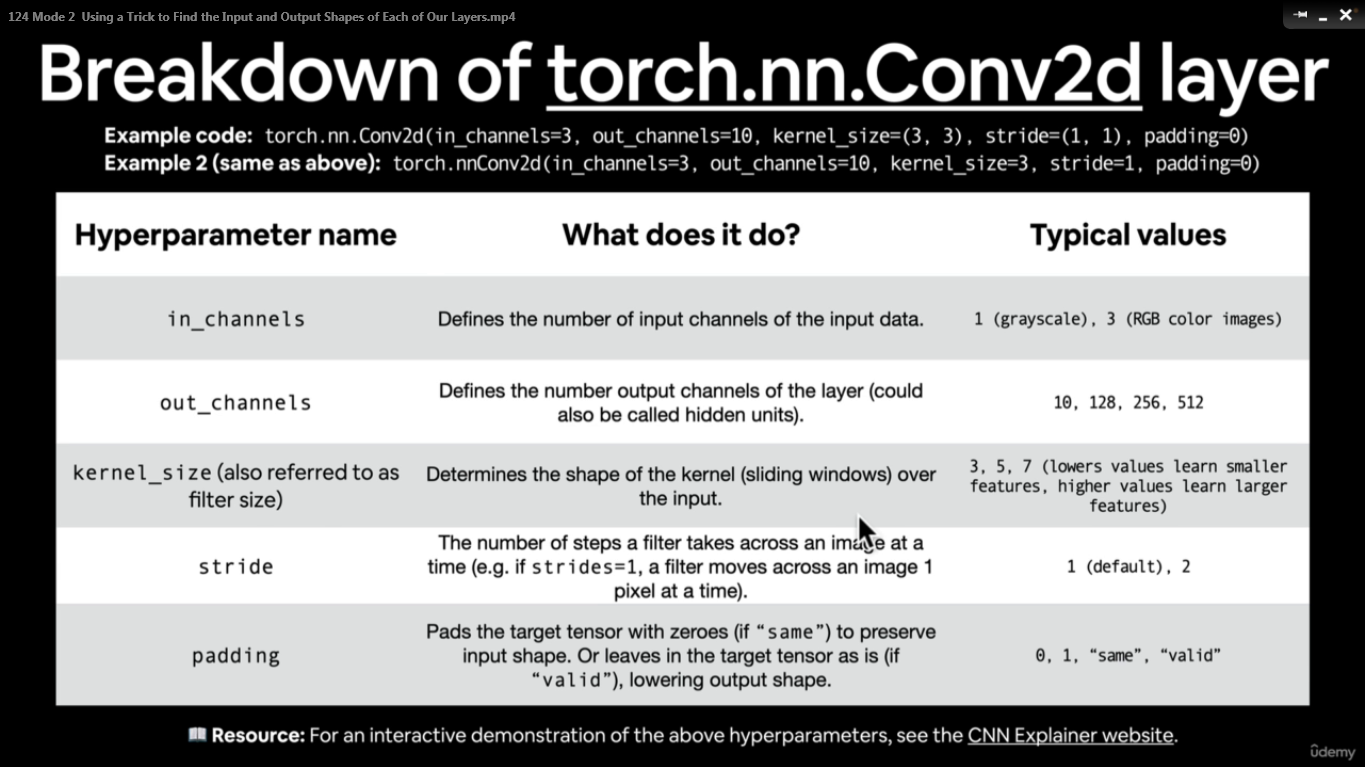

## **7.2 Setup a loss function and optimizer for model_2**

In [54]:
# Setup loss function/eval metrics/optimizer
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr=0.1)

## **7.3 Training and testing model_2 using our training and testing functions**

In [55]:
import torch
import torch.nn as nn
torch.manual_seed(42)
torch.cuda.manual_seed(42)

class FashionMNISTModelV2(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),  # flatten inputs into a single vector
            nn.Linear(in_features=input_shape, out_features=hidden_units),  # first hidden layer
            nn.ReLU(),  # activation function
            nn.Linear(in_features=hidden_units, out_features=output_shape)  # output layer
        )

    def forward(self, x: torch.Tensor):
        return self.layer_stack(x)

# Ensure the input shape matches the flattened size of each image
input_shape = 28 * 28  # for FashionMNIST
hidden_units = 10
output_shape = len(class_names)  # number of classes

model_2 = FashionMNISTModelV2(input_shape=input_shape, hidden_units=hidden_units, output_shape=output_shape).to(device)

# Create a new instance of the model
torch.manual_seed(42)
model_2 = FashionMNISTModelV2(
    input_shape=28*28,  # flattened input size
    hidden_units=10,
    output_shape=len(class_names)  # number of classes
).to(device)

# Define loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(), lr=0.1)

In [56]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Measure time
from timeit import default_timer as timer
train_time_start_model_2 = timer()

# Train and Test Model
epochs = 3
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n------")
  train_step(model=model_2,
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device)
  test_step(model=model_2,
            data_loader=test_dataloader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn,
            device=device)

train_time_end_model_2 = timer()
total_train_time_model_2 = print_train_time(start=train_time_start_model_2,
                                 end=train_time_end_model_2,
                                 device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
------
Train loss: 0.64607 | Train acc: 77.17%
Test loss: 0.53855 | Test acc: 80.76%

Epoch: 1
------
Train loss: 0.48094 | Train acc: 82.94%
Test loss: 0.49390 | Test acc: 82.46%

Epoch: 2
------
Train loss: 0.44689 | Train acc: 84.16%
Test loss: 0.45746 | Test acc: 83.99%

Train time on cuda: 28.925 seconds


In [57]:
# Get model_2 results
model_2_results = eval_model(
    model=model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn,
    device=device
)

model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.45746350288391113,
 'model_acc': 83.98562300319489}

## **8. Compare model results and training time**

In [58]:
import pandas as pd
compare_results = pd.DataFrame([model_0_results,
                                model_1_results,
                                model_2_results])

compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.476639,83.426518
1,FashionMNISTModelV1,0.457464,83.985623
2,FashionMNISTModelV2,0.457464,83.985623


In [59]:
# Add training time to results comparison
compare_results["training_time"] = [total_train_time_model_0,
                                    total_train_time_model_1,
                                    total_train_time_model_2]
compare_results

,model_name,model_loss,model_acc,training_time
0,FashionMNISTModelV0,0.476639,83.426518,26.153418
1,FashionMNISTModelV1,0.457464,83.985623,31.933671
2,FashionMNISTModelV2,0.457464,83.985623,28.925378


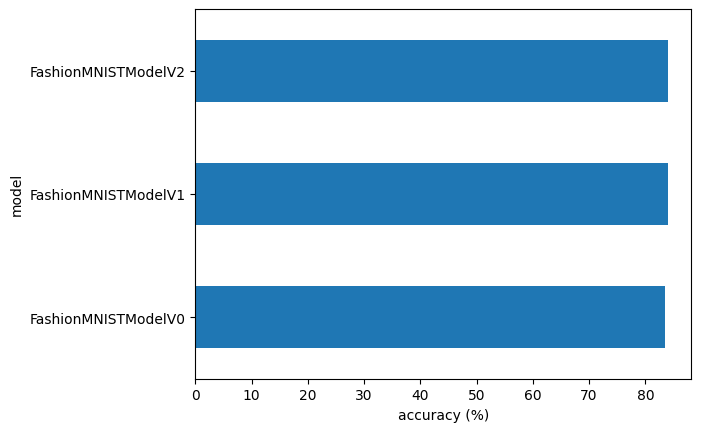

In [60]:
# Visualize our model results
compare_results.set_index("model_name")["model_acc"].plot(kind="barh") # barh = bar horizontal
plt.xlabel("accuracy (%)")
plt.ylabel("model");

## **9. Make and EVALUATE RANDOM PREDICTIONS with best model**

In [61]:
def make_predictions(model: torch.nn.Module,
                     data: list,
                     device: torch.device = device):
  pred_probs = []
  model.to(device)
  model.eval() # If you make predictions on your model, you should turn on the model.eval()
  with torch.inference_mode():
    for sample in data:
      # Prepare the sample (add a batch dimension and pass to target device)
      sample = torch.unsqueeze(sample, dim=0).to(device)

      # 1. Forward Pass (model outputs raw logits) If we have a LINEAR LAYER at the END OF OUR MODEL, it OUTPUTS RAW LOGITS
      pred_logit = model(sample)

      # 2. Get prediction probability (logits -> prediction probability)
      # If you're working with multi-class classification problem, you need to use torch.softmax() activation function on your forward pass
      pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)

      # 3. Get pred_prob off the GPU for further calculations
      pred_probs.append(pred_prob.cpu())

  # Stack the pred_probs to turn list into a tensor
  return torch.stack(pred_probs)


In [62]:
import random
random.seed(42)
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k=9):
  test_samples.append(sample)
  test_labels.append(label)

# View the first sample shape
test_samples[0].shape


torch.Size([1, 28, 28])

Text(0.5, 1.0, 'Sandal')

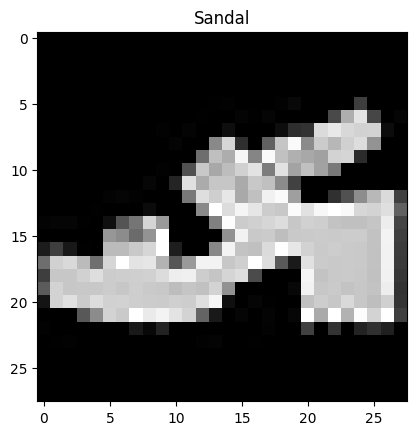

In [63]:
plt.imshow(test_samples[0].squeeze(), cmap="gray")
plt.title(class_names[test_labels[0]])

In [64]:
# Make predictions
pred_probs = make_predictions(model=model_2,
                              data=test_samples)

# View first prediction probabilities
pred_probs[:2]

tensor([[1.0565e-08, 7.1774e-09, 5.1957e-08, 1.0276e-09, 2.0116e-09, 8.1317e-01,
         3.3383e-11, 4.3710e-03, 7.3675e-07, 1.8246e-01],
        [1.0699e-01, 1.4969e-02, 7.2054e-03, 7.5190e-01, 3.9418e-02, 3.5364e-08,
         7.8446e-02, 3.2404e-05, 1.0337e-03, 1.0257e-05]])

In [65]:
# Convert prediction probabilities to labels
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([5, 3, 7, 4, 3, 0, 4, 7, 1])

In [66]:
test_labels

[5, 1, 7, 4, 3, 0, 4, 7, 1]

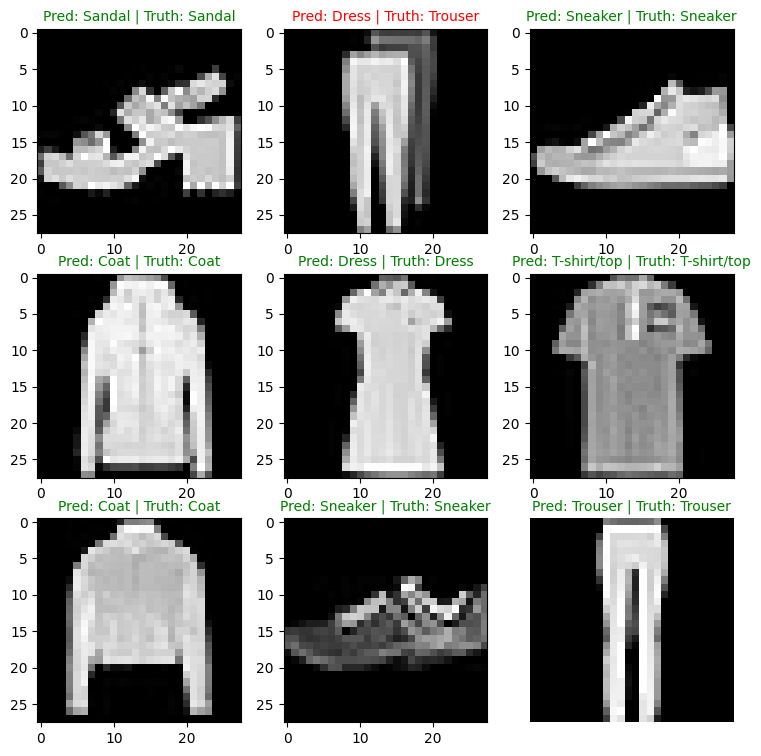

In [67]:
# Plot predictions
plt.figure(figsize=(9, 9))
nrow = 3
ncols = 3
for i, sample in enumerate(test_samples):
  # 1. Create a subplot
  plt.subplot(nrow, ncols, i+1)

  # 2. Plot the target image
  plt.imshow(sample.squeeze(), cmap="gray")

  # 3. Find the prediction (in text form, e.g "Sandal")
  pred_label = class_names[pred_classes[i]]

  # 4. Get the truth label (in text form)
  truth_label = class_names[test_labels[i]]

  # 5. Create a title for the plot
  title_text = f"Pred: {pred_label} | Truth: {truth_label}"

  # 6. Check for equality between pred and truth and change color of the title
  if pred_label == truth_label:
    plt.title(title_text, fontsize=10, c="g") # green text if prediction same as truth
  else:
    plt.title(title_text, fontsize=10, c="r")

plt.axis(False);

## **10. Making a confusion matrix for further prediction evaluation**

## * 1. Make predictions with our trained model on the test dataset

## * 2. Make a confusion matrix torchmetrics.ConfusionMatrix - https://torchmetrics.readthedocs.io/en/v0.8.2/classification/confusion_matrix.html

## * 3. Plot the confusion matrix using mlxtend.plotting.plot_confusion_matrix() - https://rasbt.github.io/mlxtend/user_guide/plotting/plot_confusion_matrix/

In [68]:
# Import TQDM AUTO for Progress Bar
from tqdm.auto import tqdm


# Make predictions with trained model
y_preds = []
model_2.eval()
with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc="Making predictions..."):

      # 1. Send the data and targets to target device
      X, y = X.to(device), y.to(device)

      # 2. Forward Pass
      y_logit = model_2(X)

      # 3. Turn predictions from LOGITS -> PREDICTION PROBABILITIES -> PREDICTION LABELS
      y_pred = torch.softmax(y_logit.squeeze(), dim=0).argmax(dim=1)

      # 4. Put predictions on CPU for EVALUATION
      y_preds.append(y_pred.cpu())

# Concatenate list of predictions into a TENSOR
# print(y_preds)
y_pred_tensor = torch.cat(y_preds)
y_pred_tensor[:10]

Making predictions...:   0%|          | 0/313 [00:00<?, ?it/s]

tensor([5, 2, 1, 1, 6, 0, 6, 6, 5, 7])

In [69]:
len(y_pred_tensor)

10000

In [70]:
# See if required packages are installed and if not, install them...
try:
  import torchmetrics, mlxtend
  print(f"mlxtend version: {mlxtend.__version__}")
  assert int(mlxtend.__version__.split(".")[1] >= 19, "mlxtend version should be 0.19.0 or higher")
except:
  !pip install torchmetrics -U mlxtend
  import torchmetrics, mlxtend
  print(f"mlxtend version {mlxtend.__version__}")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 868.8/868.8 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 29.4 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinu

In [71]:
import mlxtend
print(mlxtend.__version__)

0.23.1


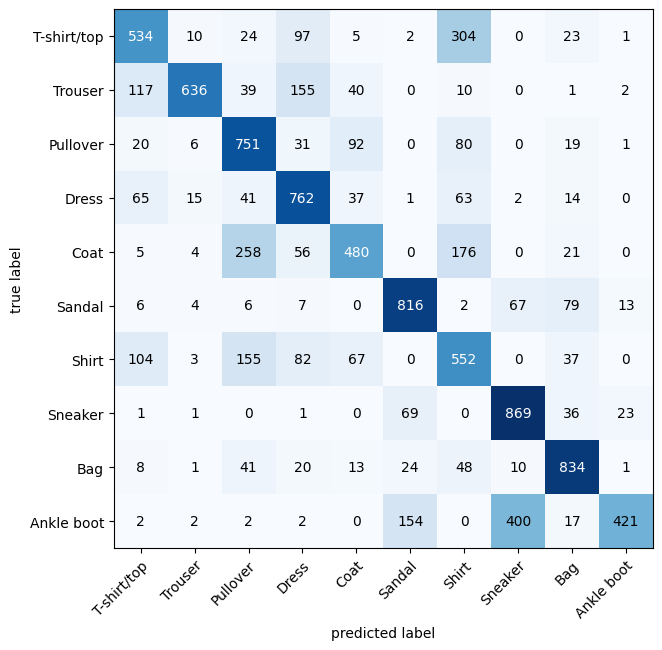

In [72]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# 2. Setup confusion instance and compare predictions to targets
confmat = ConfusionMatrix(task='multiclass', num_classes=len(class_names))
confmat_tensor = confmat(preds=y_pred_tensor,
                         target=test_data.targets)

# 3. Plot the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat = confmat_tensor.numpy(), # matplotlib likes working with NUMPY
    class_names = class_names,
    figsize=(10, 7)
)

## **11. Save and Load best performing MODEL**

In [73]:
from pathlib import Path

# 1. Create MODEL DIRECTORY PATH
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, # mkdir = MAKE DIRECTORY
                 exist_ok=True)

# 2. Create model save
MODEL_NAME = "03_PyTorch_Computer_Vision_model_2.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_2.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to: models/03_PyTorch_Computer_Vision_model_2.pth


In [76]:
class FashionMNISTModelV2(nn.Module):
    def __init__(self, input_shape, hidden_units, output_shape):
        super(FashionMNISTModelV2, self).__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(input_shape, hidden_units),
            nn.ReLU(),
            nn.Linear(hidden_units, output_shape)
        )

    def forward(self, x):
        return self.layer_stack(x)

# Input shape should be 28*28=784 for flattened images
input_shape = 28*28  # For a 28x28 image flattened
hidden_units = 10
output_shape = len(class_names)

model_2 = FashionMNISTModelV2(input_shape=input_shape,
                              hidden_units=hidden_units,
                              output_shape=output_shape).to(device)


In [85]:
# 1. Create a new instance
torch.manual_seed(42)

loaded_model_2 = FashionMNISTModelV2(input_shape=784,
                                     hidden_units=10,
                                     output_shape=len(class_names))

# 2. Load in the save state_dict()
loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

# 3. Send the model to the TARGET DEVICE
loaded_model_2.to(device)

FashionMNISTModelV2(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): ReLU()
    (3): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [88]:
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.45746350288391113,
 'model_acc': 83.98562300319489}

In [86]:
# Evaluate the loaded model
torch.manual_seed(42)

loaded_model_2_results = eval_model(
    model=loaded_model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn
)

loaded_model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.45746350288391113,
 'model_acc': 83.98562300319489}

In [87]:
# Check if model results are close to each other
torch.isclose(torch.tensor(model_2_results["model_loss"]),
              torch.tensor(loaded_model_2_results["model_loss"]),
              atol=1e-02)

tensor(True)